<a href="https://colab.research.google.com/github/Rohanjos97/machine-learning-assignments/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
import time

%matplotlib inline

### 1. Generate 20 real number for the variable X from the uniform distribution U[0,1]

In [27]:
uniform_dist_numbers = np.random.uniform(size=20)
print(f'20 Real numbers between [0,1] Uniformly distributed: \n{uniform_dist_numbers}')

20 Real numbers between [0,1] Uniformly distributed: 
[0.69805122 0.45100449 0.14413364 0.71411246 0.35060298 0.52978379
 0.58944654 0.04223801 0.39708318 0.33236134 0.62874619 0.4966787
 0.43989524 0.04729147 0.39946436 0.13095557 0.83043221 0.53670921
 0.36842814 0.5933729 ]


### 2. Construct the training set T = { (x 1 ,y 1 ),(x 2 ,y 2 ),……,(x 20 ,y 20 )} using the  relation $Y_{i}$ = sin(2 π $x_{i}$ ) + $ϵ_{i}$ where  $ϵ_{i}$  ~ N(0,0.25)

In [28]:
# create an empty set Yi
Yi=[]

# for every input as x1, x2, ... x20 from uniform_dist_numbers
# let the output be y1, y2, ... y20
for x_val in uniform_dist_numbers:
    temp_Yi = math.sin( 2 * math.pi * x_val) + np.random.uniform(0, 0.25)
    Yi.append(temp_Yi)

# create a new dataset with x and y together
T_data = pd.DataFrame(data=(uniform_dist_numbers, Yi), index=['x', 'y']).T
T_data

,x,y
0,0.698051,-0.699766
1,0.451004,0.433437
2,0.144134,0.798284
3,0.714112,-0.781007
4,0.350603,0.999418
5,0.529784,0.008841
6,0.589447,-0.474788
7,0.042238,0.492145
8,0.397083,0.842796
9,0.332361,0.875569


### 3. In the similar way construct a testing set of size 50 i.e, Test =  { (x’1, y’1), (x’2, y’2), ... , (x’50, y’50)}

In [29]:
test_uniform_dist = np.random.uniform(size=50)

test_Yi=[]

# for every input as x1, x2, ... x20 from uniform_dist_numbers
# let the output be y1, y2, ... y20
for x_test in test_uniform_dist:
    temp_Yi = math.sin( 2 * math.pi * x_test) + np.random.uniform(0, 0.25)
    test_Yi.append(temp_Yi)

# create a new dataset with x and y together
Test_data = pd.DataFrame(data=(test_uniform_dist, test_Yi), index=['x', 'y']).T
Test_data

,x,y
0,0.899341,-0.518655
1,0.369766,0.913185
2,0.848805,-0.636538
3,0.495396,0.239585
4,0.750798,-0.930071
5,0.737671,-0.875177
6,0.830830,-0.649670
7,0.917626,-0.491532
8,0.669335,-0.764850
9,0.273693,1.168958


Lets see how the testing and training plot looks like

Text(0.5, 1.0, 'Training Data')

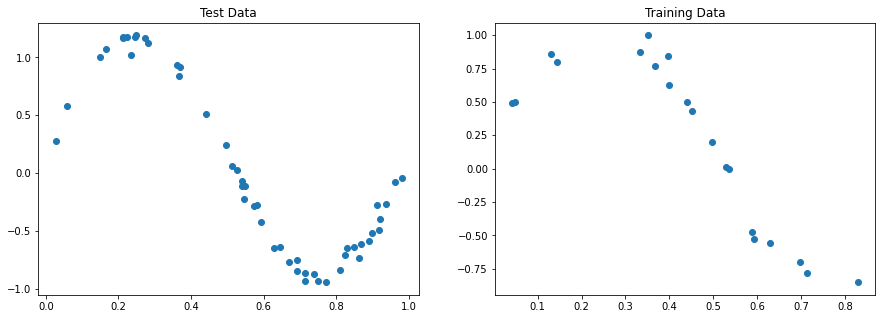

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(Test_data['x'], Test_data['y'])
axes[0].set_title('Test Data')
axes[1].scatter(T_data['x'], T_data['y'])
axes[1].set_title('Training Data')

### 4. Estimate the Least Square polynomial regression model of order M = 1, 2, 3, 9 using the training set T.(NEED TO REMOVE INBUILT LIBRARY HERE)

In [138]:
# To get the least-squares fit of a polynomial to data, use the polynomial.polyfit() in Numpy

# M=1, p(x) = c1 + c2x
# M=2, p(x) = c1 + c2x + c3x^2
# M=3, p(x) = c1 + c2x + c3x^2 + c3x^3
# M=9, p(x) = c1 + c2x + c3x^2 + c3x^3 + c3x^4 + c3x^5 + c3x^6 + c3x^7 + c3x^8 + c3x^9

def LSPR(x_dataset, y_dataset, degree):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1
  X = np.zeros((no_of_rows, no_of_cols))

  for i in range (no_of_rows):
    for j in range (no_of_cols):
      X[i][j] += math.pow(x_dataset[i], j)
  X_Trans_dot_X = np.matrix((np.dot(X.T, X))) # y_dataset.values
  X_Trans_dot_X_Inv = np.matrix((np.dot(X.T, X))).I
  temp = np.matrix(np.dot(X_Trans_dot_X_Inv, X.T))
  print(np.dot(temp, y_dataset.values))
  # print(X_Trans_dot_X)
  # X_Trans_dot_X = X_Trans_dot_X.I

  # print(X_Trans_dot_X)

lspr_m1 = LSPR(T_data['x'], T_data['y'], 1)
# lspr_m2 = LSPR(T_data['x'], T_data['y'], 2)
# lspr_m3 = LSPR(T_data['x'], T_data['y'], 3)
# lspr_m9 = LSPR(T_data['x'], T_data['y'], 9)

# LSP_ord_1 = np.polyfit(T_data['x'], T_data['y'], 1)
# LSP_ord_2 = np.polyfit(T_data['x'], T_data['y'], 2)
# LSP_ord_3 = np.polyfit(T_data['x'], T_data['y'], 3)
# LSP_ord_9 = np.polyfit(T_data['x'], T_data['y'], 9)

[[ 1.21848916 -2.33462556]]


### 5. List the value of coefficients of estimated polynomial regression models for
each case.

In [32]:
print(f'Coefficients of polynomial regression model 1: {LSP_ord_1}\n')
print(f'Coefficients of polynomial regression model 2: {LSP_ord_2}\n')
print(f'Coefficients of polynomial regression model 3: {LSP_ord_3}\n')
print(f'Coefficients of polynomial regression model 9: {LSP_ord_9}\n')

Coefficients of polynomial regression model 1: [-2.33462556  1.21848916]

Coefficients of polynomial regression model 2: [-5.15388272  1.83676464  0.61652173]

Coefficients of polynomial regression model 3: [ 22.0873552  -33.53748389  11.60638154  -0.03769164]

Coefficients of polynomial regression model 9: [ 6.67284989e+04 -2.53582509e+05  4.07063563e+05 -3.59740088e+05
  1.91194212e+05 -6.26154847e+04  1.24215630e+04 -1.41756904e+03
  8.58015902e+01 -1.39317793e+00]



### For last few questions, we need a side-by-side comparision of graphs. So, we will solve these questions together.

### 6. Obtain the prediction on testing set and compute the RMSE for polynomial regression models for order M = 1, 2, 3 and 9.

### 7. Plot the estimate obtained by polynomial regression models for order M = 1, 2, 3 and 9 for training set along  with y1, y2, ... , y50. Also plot our actual mean estimate E(Y/X) =  sin(2 π xi ).

### 8. Plot the estimate obtained by polynomial regression models for order M = 1, 2, 3 and 9 for testing set along  with y’1, y’2, ... , y’50. Also plot the sin(2 π x’i ).

#### ORDER M = 1

##### 6.1 Prediction on testing set for order M = 1

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(Test_data['x'])
test_x = X.reshape(-1, 1)

# get the start time
st = time.process_time()

poly = PolynomialFeatures(degree=1)
X_poly_m1 = poly.fit_transform(test_x)

poly.fit(X_poly_m1, Test_data['y'])

linreg = LinearRegression()
linreg.fit(X_poly_m1, Test_data['y'])

y_predicted_m1 = linreg.predict(X_poly_m1)

# get the end time
et = time.process_time()

exec_time_m1 = et-st

y_predicted_m1

array([-0.74987354,  0.44990071, -0.63538147,  0.1652804 , -0.4133438 ,
       -0.38360193, -0.59465842, -0.79129848, -0.22878412,  0.66755798,
       -0.83526145,  0.64804224, -0.78156875, -0.57837286,  0.73023449,
       -0.68227657,  0.80734265, -0.27823068,  0.77818939,  0.80413942,
        0.06436785, -0.33213689,  0.05354195,  0.75885061, -0.03031708,
       -0.55185071, -0.33145083,  0.45352536,  1.15819752,  0.12756336,
       -0.73083108, -0.17208596,  0.06159889,  0.95175503,  1.2262942 ,
       -0.79848043, -0.89181295, -0.93361245, -0.05505885,  0.09278838,
        0.9149715 ,  0.46949484,  0.04175065, -0.13936275,  0.29102999,
        0.72339581, -0.66838386, -0.45892434, -0.01438254, -0.28103275])

##### 6.2 To get the Root Mean Square Error for order M = 1

In [72]:
rmse_1 = 0;

for test_y, predicted_y in zip(Test_data['y'], y_predicted_m1):
  rmse_1 += (test_y - predicted_y)**2

rmse_1 /= len(Test_data['y'])
rmse_1 = math.sqrt(rmse_1)
print(rmse_1)


0.4210945671001499


##### 7.1 Plot the estimate obtained by polynomial regression models for order M = 1 for training set along with y1, y2, ... , y50

##### 8.1 Plot the estimate obtained by polynomial regression models for order M = 1 for testing set along with y’1, y’2, ... , y’50.

Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

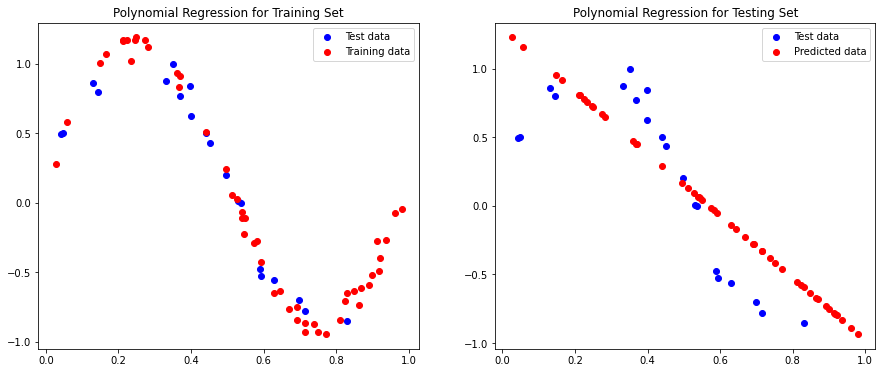

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(T_data['x'], T_data['y'], color='blue')
axes[0].scatter(Test_data['x'], Test_data['y'], color='red')
axes[0].legend(['Test data', 'Training data'])
axes[0].set_title('Polynomial Regression for Training Set')

axes[1].scatter(T_data['x'], T_data['y'], color='blue')
axes[1].scatter(Test_data['x'], y_predicted_m1, color='red')
axes[1].legend(['Test data', 'Predicted data'])
axes[1].set_title('Polynomial Regression for Testing Set')

##### 7.2 Plot the actual mean estimate E(Y/X) = sin(2 π xi ).
##### 8.2 Plot E(Y'/X) =  sin(2 π x’i )

Text(0.5, 1.0, " E(Y'/X) = sin(2 π x’i )")

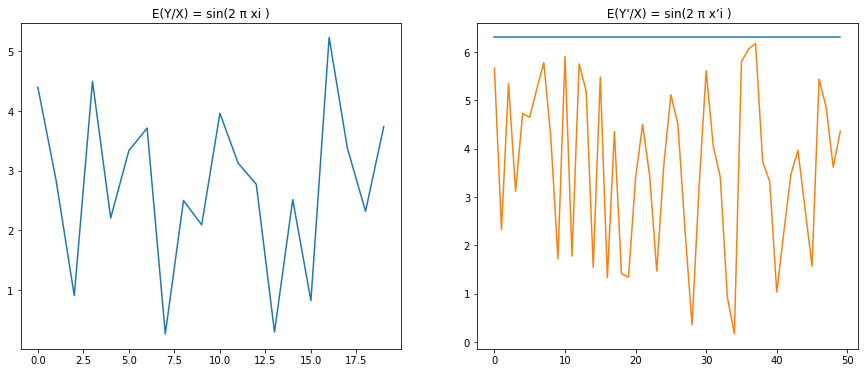

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(2 * 3.15 * T_data['x'])
axes[0].set_title('E(Y/X) = sin(2 π xi )')

axes[1].plot(2 * 3.15 * X_poly_m1)
axes[1].set_title(' E(Y\'/X) = sin(2 π x’i )')

#### ORDER M = 2

##### 6.1 Prediction on testing set for order M = 2

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(Test_data['x'])
test_x = X.reshape(-1, 1)

# get the start time
st = time.process_time()

poly = PolynomialFeatures(degree=2)
X_poly_m2 = poly.fit_transform(test_x)

poly.fit(X_poly_m2, Test_data['y'])

linreg = LinearRegression()
linreg.fit(X_poly_m2, Test_data['y'])

y_predicted_m2 = linreg.predict(X_poly_m2)

# get the end time
et = time.process_time()

exec_time_m2 = et-st

y_predicted_m2

array([-0.63529505,  0.36075864, -0.58710251,  0.02623893, -0.46546246,
       -0.44634484, -0.56757749, -0.6502961 , -0.33605492,  0.65780328,
       -0.66480058,  0.6297112 , -0.64688901, -0.55941911,  0.74996619,
       -0.60803726,  0.86741491, -0.37324478,  0.82248237,  0.86244658,
       -0.07769383, -0.4116878 , -0.08838756,  0.79303006, -0.16822836,
       -0.54570449, -0.41121231,  0.36541277,  1.45845097, -0.01350582,
       -0.62796505, -0.29114141, -0.0804374 ,  1.09944335,  1.58392269,
       -0.65276522, -0.68131473, -0.69197067, -0.1907713 , -0.04919966,
        1.03885   ,  0.38603592, -0.09993432, -0.26411619,  0.16650086,
        0.73976622, -0.60200823, -0.49346623, -0.15346552, -0.37529707])

##### 6.2 To get the Root Mean Square Error for order M = 2

In [73]:
rmse_2 = 0;

for test_y, predicted_y in zip(Test_data['y'], y_predicted_m2):
  rmse_2 += (test_y - predicted_y)**2

rmse_2 /= len(Test_data['y'])
rmse_2 = math.sqrt(rmse_2)
print(rmse_2)

0.40141926058275196


##### 7.1 Plot the estimate obtained by polynomial regression models for order M = 2 for training set along with y1, y2, ... , y50.
##### 8.1 Plot the estimate obtained by polynomial regression models for order M = 2 for testing set along with y’1, y’2, ... , y’50.

Text(0.5, 1.0, "Polynomial Regression for Testing Data along y'")

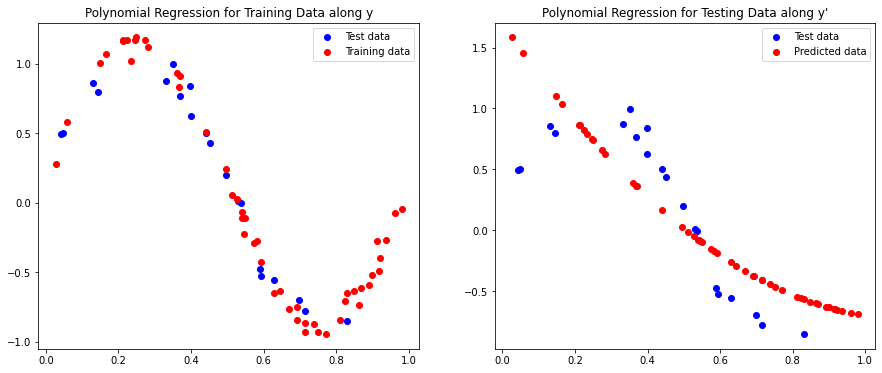

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(T_data['x'], T_data['y'], color='blue')
axes[0].scatter(Test_data['x'], Test_data['y'], color='red')
axes[0].legend(['Test data', 'Training data'])
axes[0].set_title('Polynomial Regression for Training Data along y')

axes[1].scatter(T_data['x'], T_data['y'], color='blue')
axes[1].scatter(Test_data['x'], y_predicted_m2, color='red')
axes[1].legend(['Test data', 'Predicted data'])
axes[1].set_title('Polynomial Regression for Testing Data along y\'')

##### 7.2 Plot the actual mean estimate E(Y/X) = sin(2 π xi ).
##### 8.2 Plot E(Y'/X) =  sin(2 π x’i )

Text(0.5, 1.0, " E(Y'/X) = sin(2 π x’i )")

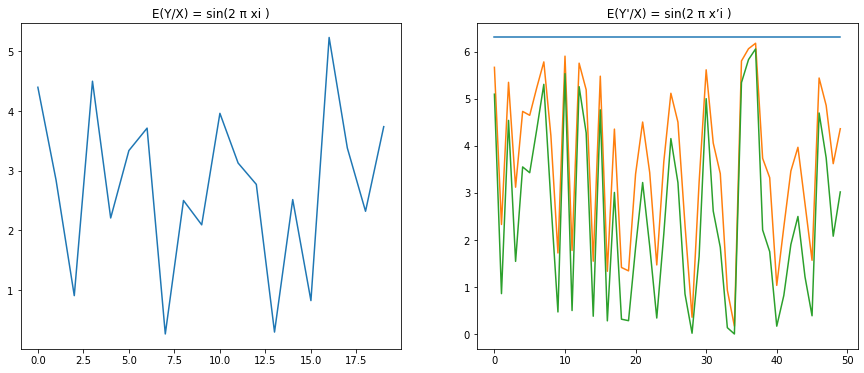

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(2 * 3.15 * T_data['x'])
axes[0].set_title('E(Y/X) = sin(2 π xi )')

axes[1].plot(2 * 3.15 * X_poly_m2)
axes[1].set_title(' E(Y\'/X) = sin(2 π x’i )')

#### ORDER M = 3

##### 6.1 Prediction on testing set for order M = 3

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(Test_data['x'])
test_x = X.reshape(-1, 1)

# get the start time
st = time.process_time()

poly = PolynomialFeatures(degree=3)
X_poly_m3 = poly.fit_transform(test_x)

poly.fit(X_poly_m3, Test_data['y'])

linreg = LinearRegression()
linreg.fit(X_poly_m3, Test_data['y'])

y_predicted_m3 = linreg.predict(X_poly_m3)

# get the end time
et = time.process_time()

exec_time_m3 = et-st

y_predicted_m3

array([-0.54012322,  0.80636967, -0.77393619,  0.15707889, -0.87662195,
       -0.86087557, -0.82506826, -0.42017881, -0.69027652,  1.12212949,
       -0.27079592,  1.10405724, -0.45013145, -0.84113963,  1.16355372,
       -0.69480447,  1.1762125 , -0.75947524,  1.17671327,  1.17659452,
       -0.08911597, -0.81977425, -0.11503717,  1.17344387, -0.30940689,
       -0.86215592, -0.81911377,  0.81337149,  0.5484506 ,  0.06445795,
       -0.58873202, -0.59655852, -0.09575969,  1.06750801,  0.26723636,
       -0.39735596, -0.04352733,  0.15105447, -0.36392026, -0.02044782,
        1.11308971,  0.84364454, -0.14309385, -0.53631908,  0.46148357,
        1.16032485, -0.72057656, -0.88847638, -0.27352424, -0.76301417])

##### 6.2 To get the Root Mean Square Error for order M = 3

In [74]:
rmse_3 = 0;

for test_y, predicted_y in zip(Test_data['y'], y_predicted_m3):
  rmse_3 += (test_y - predicted_y)**2

rmse_3 /= len(Test_data['y'])
rmse_3 = math.sqrt(rmse_3)
print(rmse_3)

0.07538899407336555


##### 7.1 Plot the estimate obtained by polynomial regression models for order M = 3 for training set along with y1, y2, ... , y50.
##### 8.1 Plot the estimate obtained by polynomial regression models for order M = 3 for testing set along with y’1, y’2, ... , y’50.

Text(0.5, 1.0, "Polynomial Regression for Testing Data along y'")

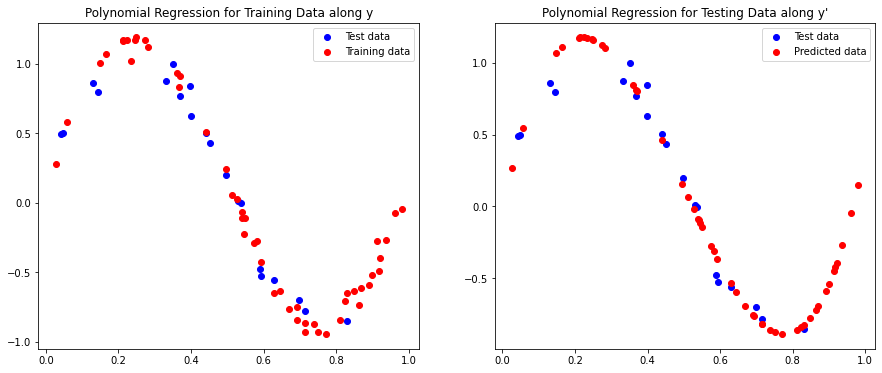

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(T_data['x'], T_data['y'], color='blue')
axes[0].scatter(Test_data['x'], Test_data['y'], color='red')
axes[0].legend(['Test data', 'Training data'])
axes[0].set_title('Polynomial Regression for Training Data along y')

axes[1].scatter(T_data['x'], T_data['y'], color='blue')
axes[1].scatter(Test_data['x'], y_predicted_m3, color='red')
axes[1].legend(['Test data', 'Predicted data'])
axes[1].set_title('Polynomial Regression for Testing Data along y\'')

##### 7.2 Plot the actual mean estimate E(Y/X) = sin(2 π xi ).
##### 8.2 Plot E(Y'/X) =  sin(2 π x’i )

Text(0.5, 1.0, " E(Y'/X) = sin(2 π x’i )")

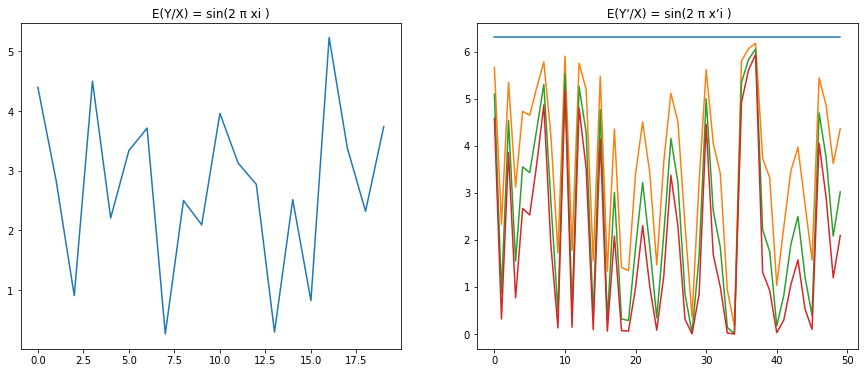

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(2 * 3.15 * T_data['x'])
axes[0].set_title('E(Y/X) = sin(2 π xi )')

axes[1].plot(2 * 3.15 * X_poly_m3)
axes[1].set_title(' E(Y\'/X) = sin(2 π x’i )')

#### ORDER M = 9

##### 6.1 Prediction on testing set for order M = 9

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(Test_data['x'])
test_x = X.reshape(-1, 1)

# get the start time
st = time.process_time()

poly = PolynomialFeatures(degree=9)
X_poly_m9 = poly.fit_transform(test_x)

poly.fit(X_poly_m9, Test_data['y'])

linreg = LinearRegression()
linreg.fit(X_poly_m9, Test_data['y'])

y_predicted_m9 = linreg.predict(X_poly_m9)

# get the end time
et = time.process_time()

exec_time_m9 = et-st

y_predicted_m9

array([-0.48211078,  0.88267386, -0.69583392,  0.1960244 , -0.89752097,
       -0.89506439, -0.75779039, -0.39304257, -0.76059794,  1.13870234,
       -0.29068544,  1.12791104, -0.414533  , -0.77994807,  1.15666791,
       -0.61449349,  1.14437476, -0.82499288,  1.1534114 ,  1.14562516,
       -0.08746854, -0.87267327, -0.1175831 ,  1.15647664, -0.34314251,
       -0.81247159, -0.87222033,  0.8892433 ,  0.5743349 ,  0.09011026,
       -0.52103002, -0.66463674, -0.09518492,  1.02315588,  0.28337023,
       -0.37693492, -0.14065328, -0.00718496, -0.40585724, -0.00784311,
        1.06609608,  0.9173341 , -0.1501968 , -0.59967673,  0.53322491,
        1.15593947, -0.63958592, -0.88655836, -0.3016584 , -0.82806433])

##### 6.2 To get the Root Mean Square Error for order M = 9

In [75]:
rmse_9 = 0;

for test_y, predicted_y in zip(Test_data['y'], y_predicted_m9):
  rmse_9 += (test_y - predicted_y)**2

rmse_9 /= len(Test_data['y'])
rmse_9 = math.sqrt(rmse_9)
print(rmse_9)

0.053419951834921514


##### 7.1 Plot the estimate obtained by polynomial regression models for order M = 9 for training set along with y1, y2, ... , y50.

Text(0.5, 1.0, "Polynomial Regression for Predicted Data along y'")

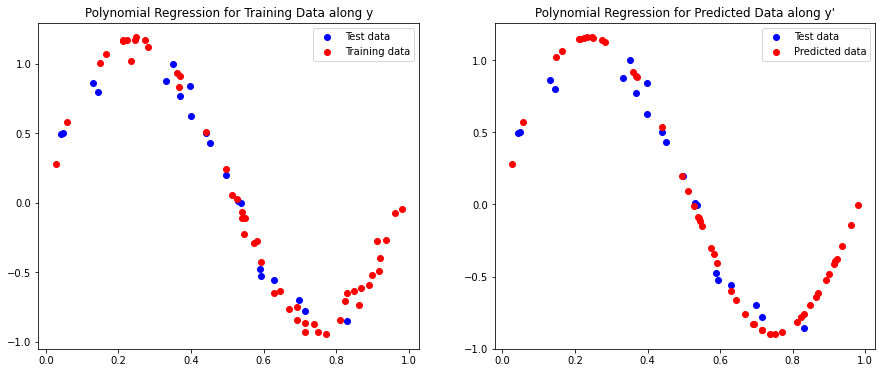

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(T_data['x'], T_data['y'], color='blue')
axes[0].scatter(Test_data['x'], Test_data['y'], color='red')
axes[0].legend(['Test data', 'Training data'])
axes[0].set_title('Polynomial Regression for Training Data along y')

axes[1].scatter(T_data['x'], T_data['y'], color='blue')
axes[1].scatter(Test_data['x'], y_predicted_m9, color='red')
axes[1].legend(['Test data', 'Predicted data'])
axes[1].set_title('Polynomial Regression for Predicted Data along y\'')

##### 7.2 Plot the actual mean estimate E(Y/X) = sin(2 π xi ).

Text(0.5, 1.0, " E(Y'/X) = sin(2 π x’i )")

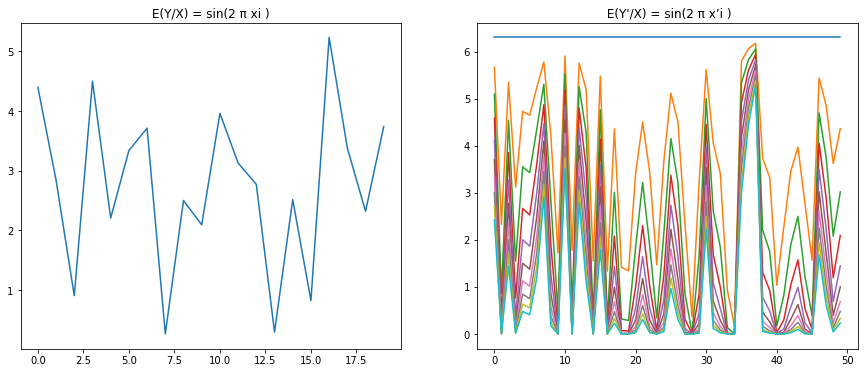

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(2 * 3.15 * T_data['x'])
axes[0].set_title('E(Y/X) = sin(2 π xi )')

axes[1].plot(2 * 3.15 * X_poly_m9)
axes[1].set_title(' E(Y\'/X) = sin(2 π x’i )')

#### While plotting the graphs against train(y1, y2... yn) and predicted(y'1, y'2... y'n) values of y, we can observe the following:

1. Order 1 means Simple linear regression. The line for predicted values obtained is a straight line. Since our plot is a function of sine, the simple linear regression is not a good fit because we cannot fit the data correctly using nothing but just a straight line.

2. When we take order M = 2, we notice that the predicted data is almost a straight line but it got a little curved at the end. Still not better than previous case, but its progress.

3. The fit improves when increasing the number of degrees. We will “usually” get a slightly better fit as we increase the order BUT a less general (and more complicated) expression. This means that when using our regression on another set of data, we will get a slightly worse fit than a more general expression would have given.

4. If we look closely the graph when order is 3, we notice that the model is starting to fit the training data with a better accuracy than previous two cases.

5. When we run the function while passing high degrees like 9, then the model tries to OVERFIT the data; means slowly the prediction line will leave its original essence and try to rely on training data points and as there is some change in the training path the line tries to catch the point. This is a problem with a High degree of polynomial.

Lets compare the execution time and the accuracy of the model for all the 4 orders.

In [76]:
order_M = [1, 2, 3, 9]
exec_time = [exec_time_m1, exec_time_m2, exec_time_m3, exec_time_m9]
rmse = [rmse_1, rmse_2, rmse_3, rmse_9]
statistical_plot = pd.DataFrame([order_M, exec_time, rmse], index=['Order M', 'Execution Time', 'RMSE']).T
statistical_plot

,Order M,Execution Time,RMSE
0,1.0,0.002163,0.421095
1,2.0,0.002092,0.401419
2,3.0,0.002571,0.075389
3,9.0,0.002558,0.053420


Text(0, 0.5, 'RMSE')

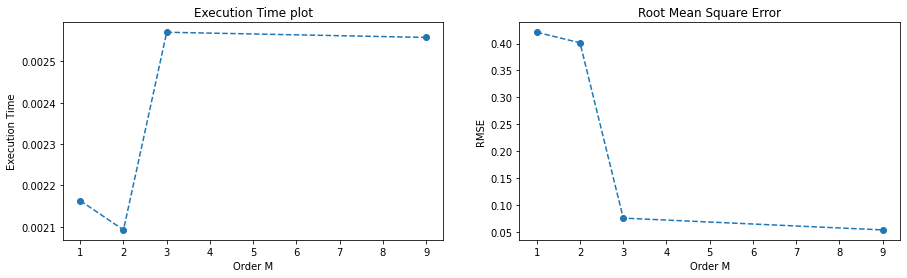

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

axes[0].plot(statistical_plot['Order M'], statistical_plot['Execution Time'], '--o')
axes[0].set_title('Execution Time plot')
axes[0].set_xlabel('Order M')
axes[0].set_ylabel('Execution Time')

axes[1].plot(statistical_plot['Order M'], statistical_plot['RMSE'], '--o')
axes[1].set_title('Root Mean Square Error')
axes[1].set_xlabel('Order M')
axes[1].set_ylabel('RMSE')

From the graph we can conclude following observations:

1. When comparing the execution time of all the orders(Graph 1), we notice that the time difference between order 3 -> 9 is huge compared to that between 2 -> 3.

2. On checking the RMSE graph(Graph 2), we notice that there is not much difference in the accuracy that we get from order 3 -> 9 when compared against the accuracy from 2->3 order.

All these parameters gives us a measure of Time-Accuracy trade-off that we are willing to make. It is evident that the accuracy that we get from selecting an order 9 polynomial regression is SLIGHTLY BETTER than the accuracy given by polynomial regression of order 3.

But it raises the question that, is the small change in accuracy really worth the difference between the execution time of orders 3 and 9?